# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


<h1>2. Random Forest and GBDT </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [28]:
project_data=project_data[["teacher_number_of_previously_posted_projects","price","clean_categories","clean_subcategories","project_title","essay","project_is_approved"]]
project_data["teacher_prefix"]=preprocessed_teacher_prefix
project_data["school_state"]=preprocessed_school_state
project_data["project_grade_category"]=preprocessed_project_grade

In [31]:
from sklearn.model_selection import train_test_split,GridSearchCV
target=project_data["project_is_approved"].values
data=project_data.drop("project_is_approved",axis=1)
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.3,random_state=42,stratify=target)

### 2.4.1 Applying Random Forests on BOW,<font color='red'> SET 1</font>

In [57]:
from scipy.sparse import hstack
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [58]:
train_set_1=hstack((tnoppp_train,price_train,school_state_train,teacher_prefix_train,project_grade_train,categories_train,subcategories_train,train_title_bow,train_essay_bow))
test_set_1=hstack((tnoppp_test,price_test,school_state_test,teacher_prefix_test,project_grade_test,categories_test,subcategories_test,test_title_bow,test_essay_bow))

In [59]:
param_grid={"n_estimators":[10, 50, 100, 150, 200, 300],"max_depth":[2, 3, 4, 5, 6, 7, 8,9]}

In [162]:
model_1=GridSearchCV(RandomForestClassifier(min_samples_split=20,class_weight="balanced"),param_grid,cv=8,scoring="roc_auc",return_train_score=True)
model_1.fit(train_set_1,y_train)

GridSearchCV(cv=8, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=20,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                            

In [164]:
print(model_1.best_estimator_)
print("="*50)
print(model_1.best_params_)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=20, min_weight_fraction_leaf=0.0,
                       n_estimators=300, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)
{'max_depth': 9, 'n_estimators': 300}


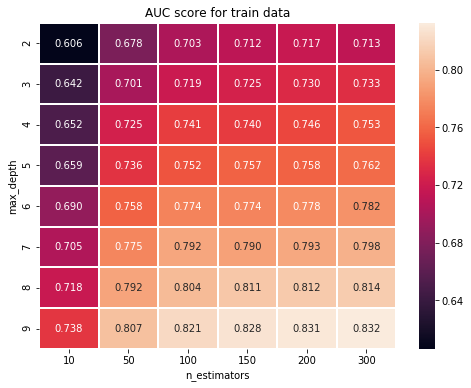

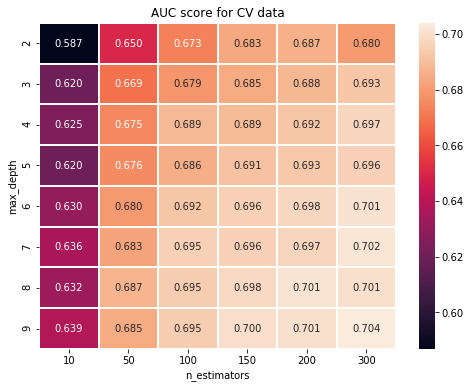

In [171]:
plt.figure(figsize=(8,6))
sns.heatmap(np.array(model_1.cv_results_["mean_train_score"]).reshape(8,6),annot=True,fmt=".3f",xticklabels=param_grid["n_estimators"],yticklabels=param_grid["max_depth"],linewidths="1")
plt.title("AUC score for train data")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.show()
plt.figure(figsize=(8,6))
sns.heatmap(np.array(model_1.cv_results_["mean_test_score"]).reshape(8,6),annot=True,fmt=".3f",xticklabels=param_grid["n_estimators"],yticklabels=param_grid["max_depth"],linewidths="1")
plt.title("AUC score for CV data")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.show()

In [170]:
print(model_1.score(train_set_1,y_train))
print(model_1.score(test_set_1,y_test))

0.8265928168896688
0.7142213739923869


In [172]:
final_model_1=model_1.best_estimator_
final_model_1.fit(train_set_1,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=20, min_weight_fraction_leaf=0.0,
                       n_estimators=300, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [173]:
pred_train_1=final_model_1.predict(train_set_1)
prob_train_1=final_model_1.predict_proba(train_set_1)
pred_test_1=final_model_1.predict(test_set_1)
prob_test_1=final_model_1.predict_proba(test_set_1)

In [174]:
from sklearn.metrics import roc_auc_score,roc_curve
print("ROC AUC score on Train dataset : ",roc_auc_score(y_train,prob_train_1[:,1]))
print("="*50)
print("Roc auc score on test data : ",roc_auc_score(y_test,prob_test_1[:,1]))

ROC AUC score on Train dataset :  0.8246008612555268
Roc auc score on test data :  0.7136959807433945


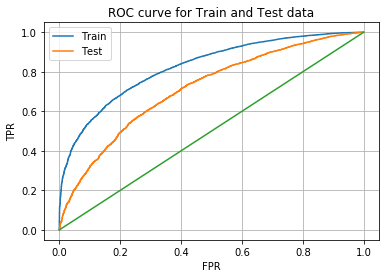

In [175]:
train_fpr_1,train_tpr_1,thresholds=roc_curve(y_train,prob_train_1[:,1])
test_fpr_1,test_tpr_1,thresholds=roc_curve(y_test,prob_test_1[:,1])
plt.plot(train_fpr_1,train_tpr_1,label="Train")
plt.plot(test_fpr_1,test_tpr_1,label="Test")
plt.title("ROC curve for Train and Test data")
plt.plot([0.0,1.0],[0.0,1.0])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.legend()
plt.show()

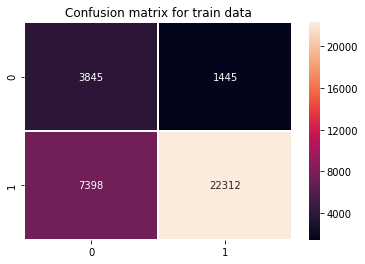

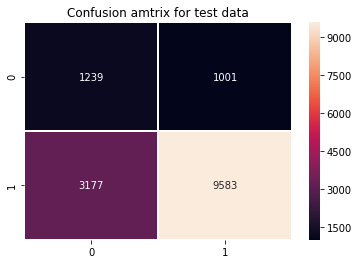

In [176]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_train,pred_train_1),annot=True,fmt="d",linewidths="1")
plt.title("Confusion matrix for train data")
plt.show()
sns.heatmap(confusion_matrix(y_test,pred_test_1),annot=True,fmt="d",linewidths="1")
plt.title("Confusion amtrix for test data")
plt.show()

<h2>2.5 Applying GBDT</h2>

<br>Apply GBDT on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.5.1 Applying XGBOOST on BOW,<font color='red'> SET 1</font>

In [63]:
import xgboost
from xgboost import XGBClassifier

In [64]:
xgb_model_1=GridSearchCV(XGBClassifier(),param_grid,cv=10,scoring="roc_auc",return_train_score=True)
xgb_model_1.fit(train_set_1,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [10, 50, 100, 150, 200, 300]},
             pre_dispatch='2*n

In [65]:
print(xgb_model_1.best_estimator_)
print("="*50)
print(xgb_model_1.best_params_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
{'max_depth': 6, 'n_estimators': 300}


In [66]:
print(xgb_model_1.score(train_set_1,y_train))
print("="*50)
print(xgb_model_1.score(test_set_1,y_test))

0.9661807415876178
0.7181867682300582


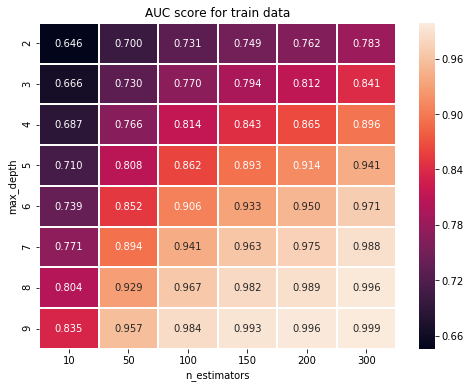

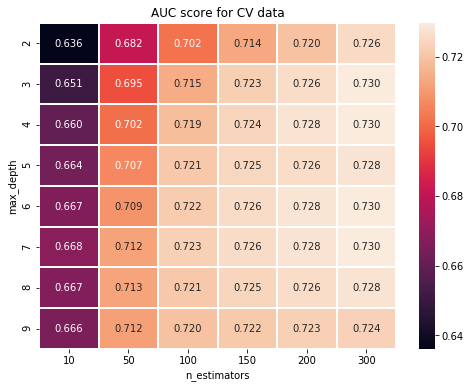

In [67]:
plt.figure(figsize=(8,6))
sns.heatmap(np.array(xgb_model_1.cv_results_["mean_train_score"]).reshape(8,6),annot=True,fmt=".3f",xticklabels=param_grid["n_estimators"],yticklabels=param_grid["max_depth"],linewidths="1")
plt.title("AUC score for train data")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.show()
plt.figure(figsize=(8,6))
sns.heatmap(np.array(xgb_model_1.cv_results_["mean_test_score"]).reshape(8,6),annot=True,fmt=".3f",xticklabels=param_grid["n_estimators"],yticklabels=param_grid["max_depth"],linewidths="1")
plt.title("AUC score for CV data")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.show()

In [68]:
xgb_final_model_1=xgb_model_1.best_estimator_
xgb_final_model_1.fit(train_set_1,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [69]:
xgb_pred_train_1=xgb_final_model_1.predict(train_set_1)
xgb_prob_train_1=xgb_final_model_1.predict_proba(train_set_1)
xgb_pred_test_1=xgb_final_model_1.predict(test_set_1)
xgb_prob_test_1=xgb_final_model_1.predict_proba(test_set_1)

In [79]:
print("% of misclassified train points : ",np.count_nonzero((xgb_pred_train_1-y_train))/y_train.shape[0])

% of misclassified train points :  0.1176


In [77]:
print("% of misclassified test points : ",np.count_nonzero((xgb_pred_test_1-y_test))/y_test.shape[0])

% of misclassified test points :  0.1536


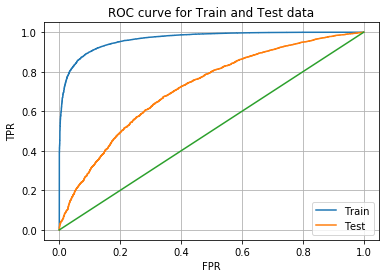

In [78]:
train_fpr_1,train_tpr_1,thresholds=roc_curve(y_train,xgb_prob_train_1[:,1])
test_fpr_1,test_tpr_1,thresholds=roc_curve(y_test,xgb_prob_test_1[:,1])
plt.plot(train_fpr_1,train_tpr_1,label="Train")
plt.plot(test_fpr_1,test_tpr_1,label="Test")
plt.title("ROC curve for Train and Test data")
plt.plot([0.0,1.0],[0.0,1.0])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.legend()
plt.show()

In [81]:
from sklearn.metrics import roc_auc_score
print("ROC AUC score on Train dataset : ",roc_auc_score(y_train,xgb_prob_train_1[:,1]))
print("="*50)
print("Roc auc score on test data : ",roc_auc_score(y_test,xgb_prob_test_1[:,1]))

ROC AUC score on Train dataset :  0.9661807415876178
Roc auc score on test data :  0.7181867682300582


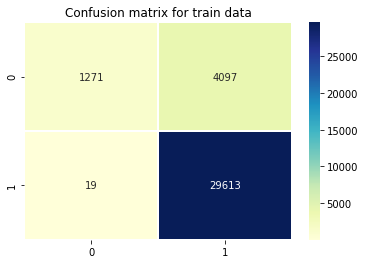

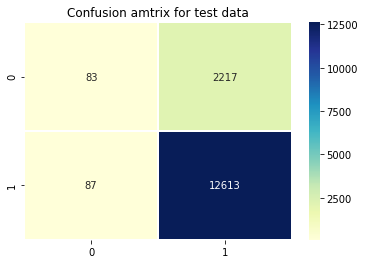

In [87]:
sns.heatmap(confusion_matrix(y_train,xgb_pred_train_1),annot=True,fmt="d",linewidths="1",cmap="YlGnBu")
plt.title("Confusion matrix for train data")
plt.show()

sns.heatmap(confusion_matrix(y_test,xgb_pred_test_1),annot=True,fmt="d",linewidths="1",cmap="YlGnBu")
plt.title("Confusion amtrix for test data")
plt.show()